# Module 2 - Wrap-Up Quiz

## Importing Pandas

In [1]:
import pandas as pd

## Loading Data

In [2]:
blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]
# Checking data
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


## Checking target type and imbalance

In [3]:
target.value_counts()

Class
not donated    570
donated        178
Name: count, dtype: int64

Since the target has categorical values, it is a classification problem. We can check how many classes are present to know if we have a binary or a multiclass classification problem. We see that the problem is a binary classification with 2 classes, namely `donated` and `not donated`. Now, we should check the number of samples in each of the class to know the ratio of the class counts.

We can also use the `value_count()` method with the option `normalize=True`, which returns normalized values.

In [4]:
target.value_counts(normalize=True)

Class
not donated    0.762032
donated        0.237968
Name: proportion, dtype: float64

~75% of the samples belong to the class `not donated` while only ~25% of the samples belong to the class `donated`.

## Baseline accuracy using DummyClassifier

In [5]:
from sklearn.dummy import DummyClassifier
# since we only care for the test score, we will replace cross_validate with cross_val_score
from sklearn.model_selection import cross_val_score

baseline_model = DummyClassifier(strategy='most_frequent')

scores = cross_val_score(baseline_model, data, target, cv=10)

print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f} "
)

The mean cross-validation accuracy is: 0.762 ± 0.004 


N.B. The obtained accuracy is nothing but $$\frac{number_{\text{not donated}}}{number_{\text{not donated}}+number_{\text{donated}}}=\frac{570}{570+178}=0.762$$

This is not a surprise to get a score a high as ~75%. This is due to the class imbalanced nature of the dataset: always predicting not donated class will be correct ~75% of the time since this the natural proportion of samples belonging to this class in the data.

With `scoring="balanced_accuracy"`

In [6]:
scores = cross_val_score(baseline_model, data, target, cv=10, scoring="balanced_accuracy")

print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f} "
)

The mean cross-validation accuracy is: 0.500 ± 0.000 


In this case, the score is corrected such that such a dummy approach will give a score of 50%. You can learn more about how `balanced_accuracy` is computed in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html). Therefore `balanced_accuracy` makes it easier to distinguish good from bad classifiers on imbalanced classification problems.

The `balanced accuracy` is defined as the average of recall obtained on each class. Refer to the documetation on [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) and [Balanced Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score) for more info on the mathematical formulas.

## Why is it relevant to add a preprocessing step to scale the data using a `StandardScaler` when working with a `KNeighborsClassifier`?

Computing distances on scaled or un-scaled data takes similar time but the resulting distance values could be very different and therefore ordering of which sample is a closest neighbor to which sample also.
For instance: if you have two variables A and B, where A has values which vary between 0 and 1000000 (e.g. the price of a house in euros) and B is a variable that varies between 0 and 30 (e.g. the average outside air temperature in Celsius degrees), then computing distances between rows of such a database will be mostly impacted by the differences in values of the A column and the values of B column will be comparatively ignored.
If one applies `StandardScaler` to such a database, both the values of A and B will be approximately between -3 and 3 and the neighbor structure will be impacted by both variables.

## KNN Model

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

Inspect the parameters of the created pipeline. What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?

In [17]:
# Checking model parameters
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

Since we did not specify any parameters for the `KNeighborsClassifier`, the number of neighbors K is 5. This means that when the model has to predict the class of a given test sample, it will compute the distances between that test sample and all the samples of the training set, order them by ascending distances and return the class of the majority of the 5 closest neighbors.

For more info, consult the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

***
Set `n_neighbors=1` in the previous model and evaluate it using a 10-fold cross-validation. Use the balanced accuracy as a score. What can you say about this model? Compare the average of the train and test scores to argument your answer.

One way to change the parameters of a model after creating an instance is to use the `set_params()` method.

In [74]:
model.set_params(kneighborsclassifier__n_neighbors=1)
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [75]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=10, return_train_score=True, scoring="balanced_accuracy")

train_scores = cv_results["train_score"]
test_scores = cv_results["test_score"]

print(
    "The mean cross-validation train accuracy is: "
    f"{train_scores.mean():.3f} ± {train_scores.std():.3f} "
)
print(
    "The mean cross-validation test accuracy is: "
    f"{test_scores.mean():.3f} ± {test_scores.std():.3f} "
)

The mean cross-validation train accuracy is: 0.883 ± 0.008 
The mean cross-validation test accuracy is: 0.484 ± 0.105 


We see that the gap between train and test scores is large. The mean cross-validation train accuracy is 0.883, while the mean test accuracy is 0.484 (almost half). The model clearly overfits.

The `KneighborsClassifier` overfits when the number of neighbors is small. A ballpark estimate would be to start with $K=\log(n_{samples})$ and increase K. For more details consult [this link](https://stats.stackexchange.com/questions/384542/how-to-prevent-overfitting-with-knn).

## Hyperparameter Tuning

We can change the hyperparameter using a for loop

In [65]:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores = []
test_scores = []
# Looping over param_range
for i in param_range:
    model.set_params(kneighborsclassifier__n_neighbors=i)
    print(f"K = {model.get_params()['kneighborsclassifier__n_neighbors']}")
    print('-'*25)
    cv_results = cross_validate(model, data, target, cv=5, return_train_score=True, scoring="balanced_accuracy")
    train_scores.append(cv_results["train_score"].mean())
    test_scores.append(cv_results["test_score"].mean())
    print(f"{'avg. train score:':<20}{train_scores[-1]:.3f}")
    print(f"{'avg. test score:':<20}{test_scores[-1]:.3f}\n")

K = 1
-------------------------
avg. train score:   0.890
avg. test score:    0.490

K = 2
-------------------------
avg. train score:   0.842
avg. test score:    0.501

K = 5
-------------------------
avg. train score:   0.710
avg. test score:    0.515

K = 10
-------------------------
avg. train score:   0.697
avg. test score:    0.554

K = 20
-------------------------
avg. train score:   0.678
avg. test score:    0.601

K = 50
-------------------------
avg. train score:   0.624
avg. test score:    0.568

K = 100
-------------------------
avg. train score:   0.536
avg. test score:    0.554

K = 200
-------------------------
avg. train score:   0.500
avg. test score:    0.500

K = 500
-------------------------
avg. train score:   0.500
avg. test score:    0.500



Plotting results

Text(0, 0.5, 'Avg. Accuracy')

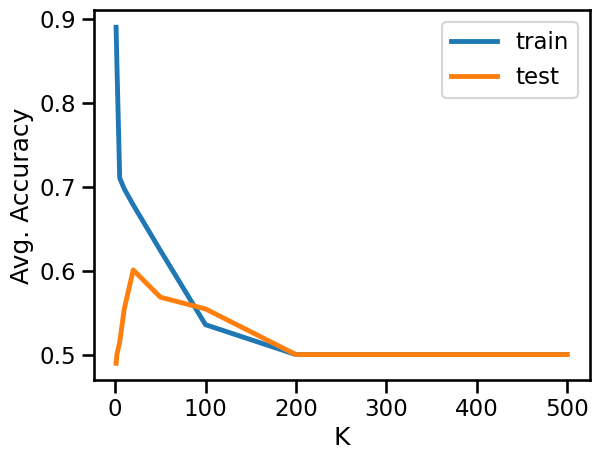

In [68]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_scores, label = 'train')
plt.plot(param_range, test_scores, label = 'test')
plt.legend()
plt.xlabel('K')
plt.ylabel('Avg. Accuracy')

Or, We can use `ValidationCurveDisplay`

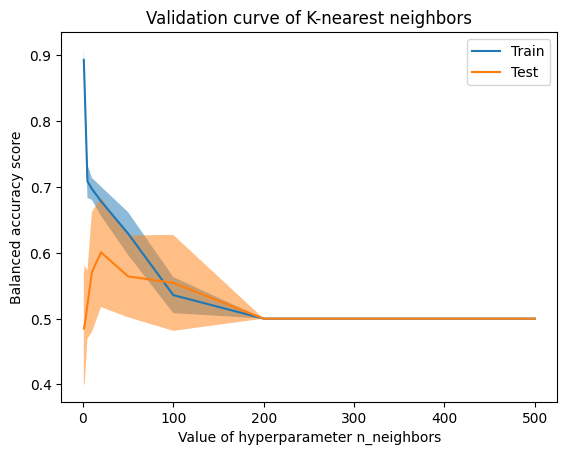

In [13]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    scoring="balanced_accuracy",
    n_jobs=2,
)

_ = disp.ax_.set(
    xscale="linear",
    xlabel="Value of hyperparameter n_neighbors",
    ylabel="Balanced accuracy score",
    title="Validation curve of K-nearest neighbors",
)

For more info on `xscale`, use [this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)

Underfitting happens when the gap between train and test scores is low and that both scores are low. When `n_neighbors` is high, underfitting occurs. The model lacks expressivity because it always considers the majority class of a large number of data points. Its prediction tends to be always the same, irrespective of the test point of interest.

Overfitting happens when the gap between train and test scores is high and that the test score is low. When `n_neighbors` is low, the model looks at small number of data points around the test points of interest. In this case the model is too flexible: it is sensible to noise rather than the underlying structure of the data.

Generalization happens when the gap between train and test scores is relatively low and that the test scores is maximum. In our case, the range between 20 to 50 neighbors seems to be the best. Indeed, for 20 neighbors, the gap between train and test scores is larger than with 50 neighbors; however the test score is better with 20 neighbors.

Considering an intermediate value for n_neighbors makes it possible to limit overfitting by averaging out the influence of a few noisy samples. On the other hand, the model can also avoid underfitting by focusing its decision on the details of a region of interest close to the test sample. The optimum value for `n_neighbors` is typically very dataset-dependent and can be influenced by the choice of the distance metric, the scaling of the features, the presence of noisy samples, the balance between classes, etc.

Finally notice that, while k-nearest neighbors is useful baseline, it can be too slow to predict on large datasets with many samples and features. Practitioners would instead favor other models such as gradient boosted trees for instance. On the particular dataset used for this quiz, the best accuracy achieved by the nearest neighbors model does not seem to be high enough to make it useful in practice.

## Testing the effect of StandardScalar

In [101]:
# Simple KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=10)
# KNeighborsClassifier with StandardScaler
model_2 = make_pipeline(StandardScaler(), model_1)

In [102]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model_1, data, target, cv=10, return_train_score=True, scoring="balanced_accuracy")

train_scores = cv_results["train_score"]
test_scores = cv_results["test_score"]
time = cv_results["fit_time"]

print(
    "The mean cross-validation train accuracy is: "
    f"{train_scores.mean():.3f} ± {train_scores.std():.3f} "
)
print(
    "The mean cross-validation test accuracy is: "
    f"{test_scores.mean():.3f} ± {test_scores.std():.3f} "
)
print(
    "The mean fit time is: "
    f"{1000*time.mean():.2f} ms ± {1000*time.std():.2f} ms"
)

The mean cross-validation train accuracy is: 0.666 ± 0.010 
The mean cross-validation test accuracy is: 0.539 ± 0.034 
The mean fit time is: 3.17 ms ± 0.44 ms


In [103]:
cv_results = cross_validate(model_2, data, target, cv=10, return_train_score=True, scoring="balanced_accuracy")

train_scores = cv_results["train_score"]
test_scores = cv_results["test_score"]
time = cv_results["fit_time"]

print(
    "The mean cross-validation train accuracy is: "
    f"{train_scores.mean():.3f} ± {train_scores.std():.3f} "
)
print(
    "The mean cross-validation test accuracy is: "
    f"{test_scores.mean():.3f} ± {test_scores.std():.3f} "
)
print(
    "The mean fit time is: "
    f"{1000*time.mean():.2f} ms ± {1000*time.std():.2f} ms"
)

The mean cross-validation train accuracy is: 0.685 ± 0.020 
The mean cross-validation test accuracy is: 0.550 ± 0.080 
The mean fit time is: 4.86 ms ± 1.43 ms


For this specific dataset, we do not see a drastic improvement in the model performance. However, The k-nearest neighbor algorithm relies on majority voting based on class membership of 'k' nearest samples for a given test point. The nearness of samples is typically based on Euclidean distance. Computing distances on scaled or un-scaled data takes similar time but the resulting distance values could be very different and therefore ordering of which sample is a closest neighbor to which sample also. Without normalization, the nearest neighbors are mainly defined by the feature with the bigger range/numbers, which leads to incorrect classification.

For instance: if you have two variables A and B, where A has values which vary between 0 and 1000000 (e.g. the price of a house in euros) and B is a variable that varies between 0 and 30 (e.g. the average outside air temperature in Celsius degrees), then computing distances between rows of such a database will be mostly impacted by the differences in values of the A column and the values of B column will be comparatively ignored. If one applies StandardScaler to such a database, both the values of A and B will be approximately between -3 and 3 and the neighbor structure will be impacted by both variables.

Normalization and Standardization helps solve the problem, as most feature will lie more or less on the same range, therefore contributing approximately equally to the distance computation. 

For more reading:
* [Should I normalize or standardize my dataset for knn?](https://stackoverflow.com/questions/55073423/should-i-normalize-or-standardize-my-dataset-for-knn)
* [Accuracy difference on normalization in KNN](https://stackoverflow.com/questions/42092448/accuracy-difference-on-normalization-in-knn?rq=3)
* [Why do you need to scale data in KNN](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn)